<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-2---King-County-Housing-Project" data-toc-modified-id="Mod-2---King-County-Housing-Project-1">Mod 2 - King County Housing Project</a></span><ul class="toc-item"><li><span><a href="#King-County" data-toc-modified-id="King-County-1.1">King County</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2">Methodology</a></span></li><li><span><a href="#Data-Obtaining-and-Scrubbing" data-toc-modified-id="Data-Obtaining-and-Scrubbing-1.3">Data Obtaining and Scrubbing</a></span></li><li><span><a href="#Understanding-our-data-set" data-toc-modified-id="Understanding-our-data-set-1.4">Understanding our data set</a></span></li><li><span><a href="#Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-downtown-close-to-King-County." data-toc-modified-id="Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-downtown-close-to-King-County.-1.5">Adding a new feature, Distance to Bellevue, which is a downtown close to King County.</a></span></li><li><span><a href="#Selecting-our-data-based-on-the-price-of-the-house" data-toc-modified-id="Selecting-our-data-based-on-the-price-of-the-house-1.6">Selecting our data based on the price of the house</a></span></li><li><span><a href="#OLS-Model-Baseline" data-toc-modified-id="OLS-Model-Baseline-1.7">OLS Model Baseline</a></span></li><li><span><a href="#Run-the-same-model-in-Scikit-Learn" data-toc-modified-id="Run-the-same-model-in-Scikit-Learn-1.8">Run the same model in Scikit-Learn</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.9">Feature Selection</a></span></li><li><span><a href="#Variance-Inflation-Factor" data-toc-modified-id="Variance-Inflation-Factor-1.10">Variance Inflation Factor</a></span></li><li><span><a href="#Reselecting-the-variables" data-toc-modified-id="Reselecting-the-variables-1.11">Reselecting the variables</a></span></li><li><span><a href="#Stepwise-selection-with-p-values" data-toc-modified-id="Stepwise-selection-with-p-values-1.12">Stepwise selection with p-values</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-1.13">Observations</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.14">Conclusion</a></span></li><li><span><a href="#Future-work-and-research" data-toc-modified-id="Future-work-and-research-1.15">Future work and research</a></span></li></ul></li></ul></div>

## Mod 2 - King County Housing Project

Please fill out:
* __Student name: Vidya Menon__
* __Student pace: Full Time__
* __Scheduled project review date/time: 05/04/2020 3PM__
* __Instructor name: Amber Yandow__


### King County
King County is a county located in the U.S. state of Washington. It is one of the most populous county in Washington. King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
This notebook contains analysis of the housing data in King County to understand which factors are important when selling a house.

Through this analysis we are going to answer some of the questions as below:    
__Q1- What is the average cost of a house in King County?__

__Q2- Does Renovation have an effect on increasing the price of a house?__

__Q3- What are the important features to consider while selling a house?__

__Q4- How does the distance to a downtown effect the cost of a house?__

__Q5- Does having a waterfront view effect the price of a house?__


In [119]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import lmplot
from seaborn import distplot, boxplot, despine

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure
from matplotlib.pyplot import subplot
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import scipy

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas_bokeh
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [120]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [121]:
#!ls

 ### Methodology
*__OSEMN Methodology__ -  This is the one of the most straightforward of the Data Science processes. During this process,the stages often blur together. It is completely acceptable (and often a best practice!) to float back and forth between stages as you learn new things about your problem, dataset, requirements, etc. It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. As with any of the frameworks, OSEMN is meant to be treated more like a set of guidelines for structuring your project than set-in-stone steps that cannot be violated.

- __Obtain__ - This step involves understanding stakeholder requirements, gathering information on the problem, and finally, sourcing data that we think will be necessary for solving this problem.
- __Scrub__ - During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.
- __Explore__ -  During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks like that.
- __Model__ -  It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.
- __Interpret__ - During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. If your results are satisfactory to all stakeholders involved, you may also go from this stage right into putting your model into production and automating processes necessary to support it.

### Data Obtaining and Scrubbing

In [122]:
king_data = pd.read_csv('kc_house_data.csv')
display(king_data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [123]:
king_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [124]:
# import contextily as ctx
# import geopandas

# gdf = geopandas.GeoDataFrame(king_data, geometry=geopandas.points_from_xy(king_data.long, king_data.lat), crs="EPSG:4326")
# gdf

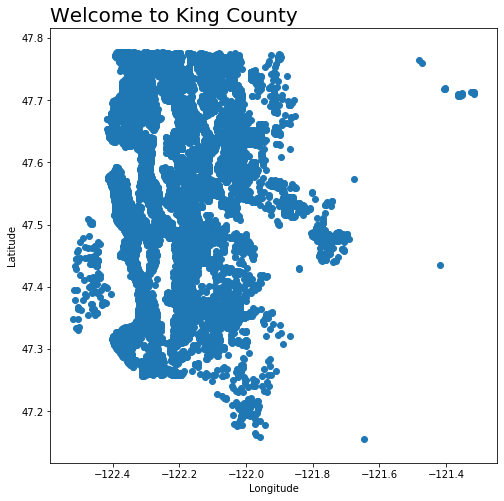

In [125]:
# Map of King County
plt.figure(figsize= (8, 8))
plt.scatter(x='long',y='lat',data=king_data)
plt.title('Welcome to King County',fontsize=20,loc='left')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show();


# gdf = gdf.to_crs(epsg=3857)
# homes = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k', label='house')
# plt.legend()

# ctx.add_basemap(homes, source=ctx.providers.Stamen.TerrainBackground)
# homes.set_axis_off()



### Understanding our data set
- __In our data file, the term Condition refers to the “Building Condition”. It has values between 1 and 5, where 1 indicates a worn-out property and 5 indicates a very good condition.__
- __Grade has an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.__ 
- __View - An index from 0 to 4 of how good the view of the property is.__

In [126]:
# Checking the range of our data which shows that it is from May 2014 to May 2015
king_data['date'] = pd.to_datetime(king_data['date'])
print(king_data['date'].min(), king_data['date'].max())

2014-05-02 00:00:00 2015-05-27 00:00:00


<Figure size 1440x720 with 0 Axes>

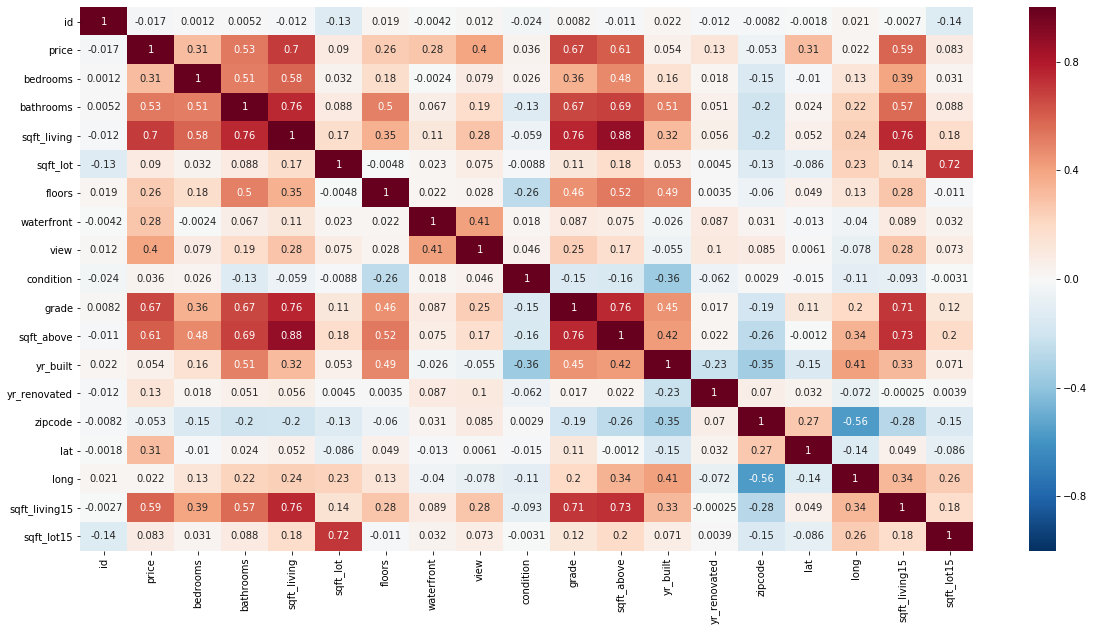

In [127]:
correlation = king_data.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [128]:
np.round(king_data.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [129]:
print ("The average home price in King County is $" + str(int(round(king_data.price.mean()))))

The average home price in King County is $540297


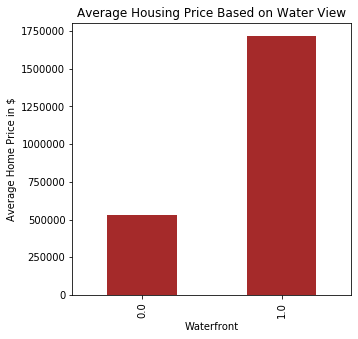

In [130]:
#To understand the effect of waterview on the price of a house

king_data.groupby("waterfront").price.mean().plot(kind="bar",figsize=(5,5),color='brown');
plt.title("Average Housing Price Based on Water View")
plt.ylabel("Average Home Price in $")
plt.xlabel("Waterfront");

<Figure size 360x360 with 0 Axes>

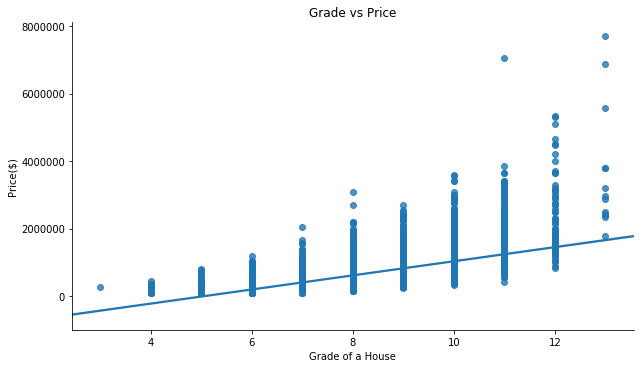

In [131]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="grade", y="price",aspect=1.8,data=king_data)
plt.title("Grade vs Price")
g.set_xlabels("Grade of a House")
g.set_ylabels("Price($)")
plt.show();

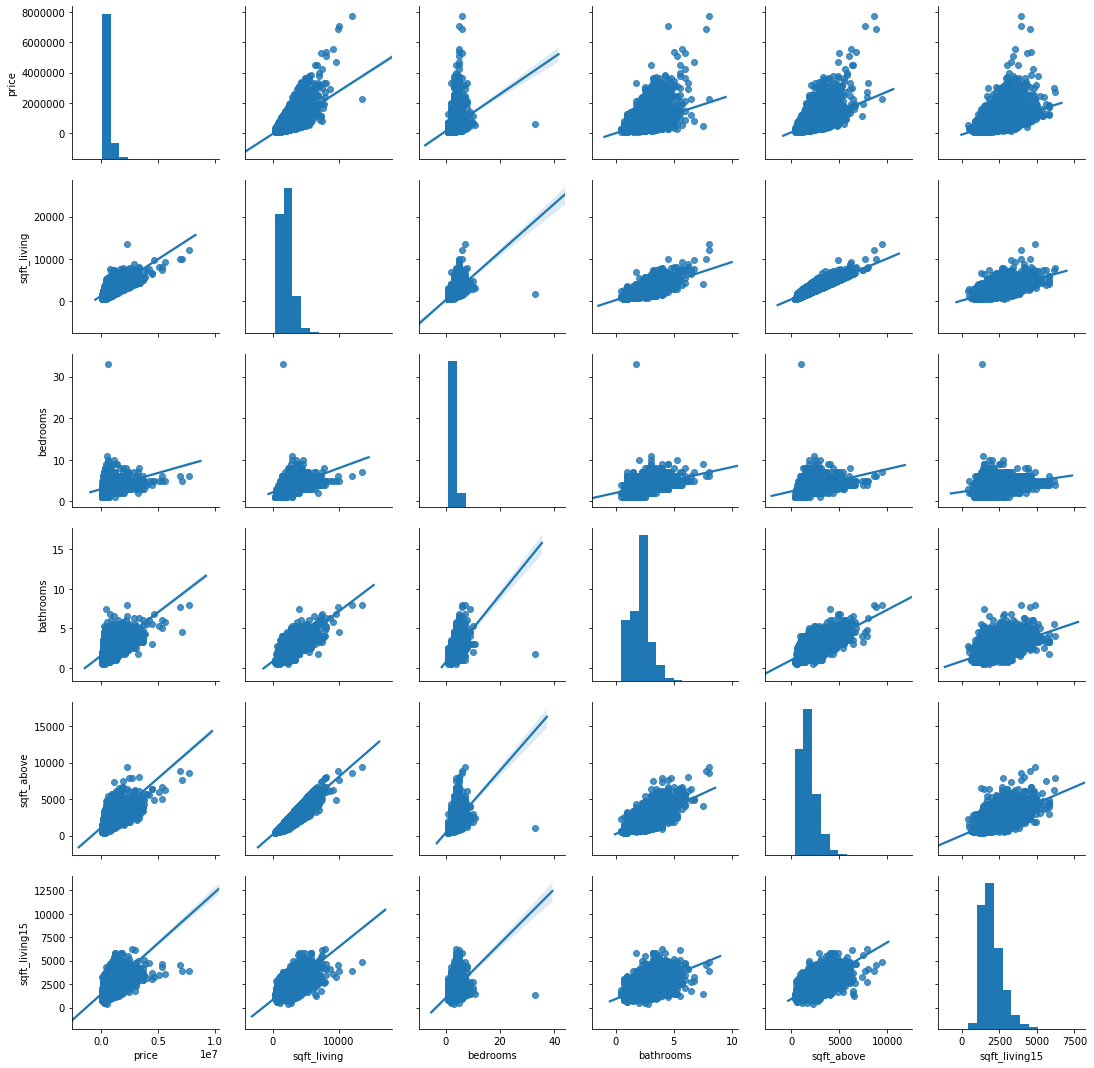

In [132]:
sns.pairplot(king_data[["price","sqft_living","bedrooms","bathrooms","sqft_above","sqft_living15"]],kind="reg")

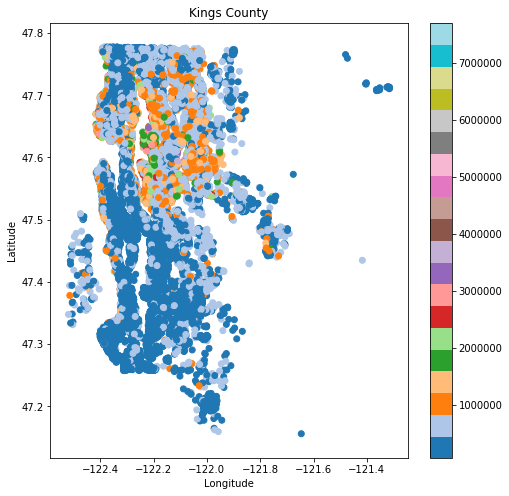

In [133]:
#Used the reference here for colormaps - https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize= (8, 8))
x = king_data['long']
y = king_data['lat']

plt.scatter(x, y, c=king_data['price'], cmap='tab20', marker='o')
plt.title('Kings County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show;

In [134]:
special_features = ["grade","bedrooms","bathrooms"]


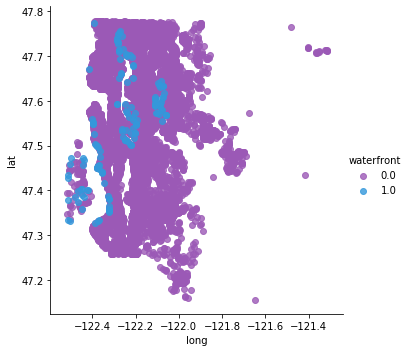

In [135]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # This is the color range
lmplot(data=king_data, x="long", y="lat",fit_reg=False, hue="waterfront", height=5,palette=sns.color_palette(flatui))

show();

Text(0.5, 1, 'Distribution of grade across the County')

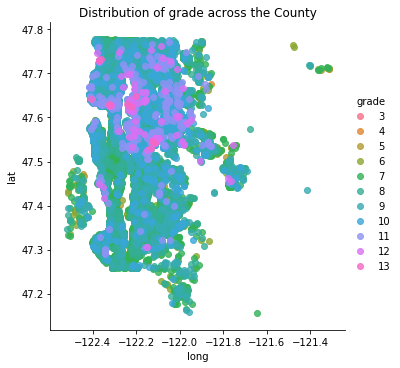

Text(0.5, 1, 'Distribution of bedrooms across the County')

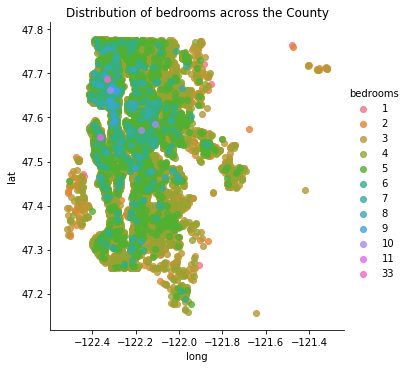

Text(0.5, 1, 'Distribution of bathrooms across the County')

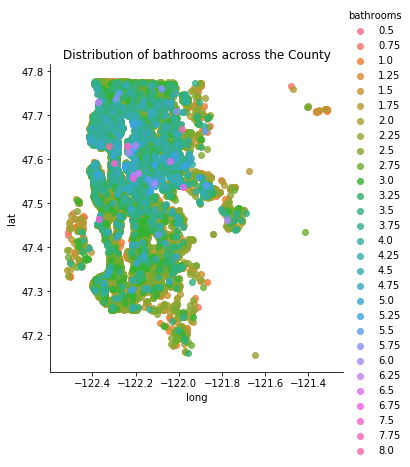

In [136]:
for x in special_features:
    lmplot(data=king_data, x="long", y="lat",fit_reg=False, hue=x, height=5)
    plt.title('Distribution of '+x +' across the County')
    plt.show();

<Figure size 360x360 with 0 Axes>

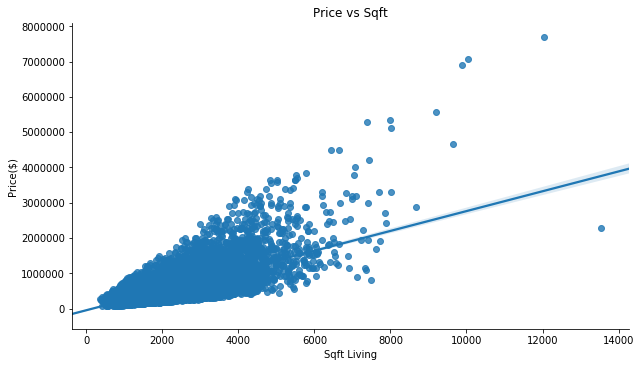

In [137]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=king_data)
plt.title("Price vs Sqft")
g.set_xlabels("Sqft Living")
g.set_ylabels("Price($)")
plt.show();

<Figure size 360x360 with 0 Axes>

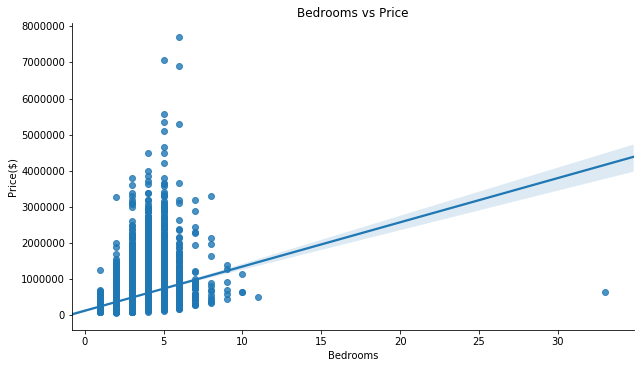

In [138]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="bedrooms", y="price",aspect=1.8,data=king_data)
plt.title("Bedrooms vs Price")
g.set_xlabels("Bedrooms")
g.set_ylabels("Price($)")
plt.show();

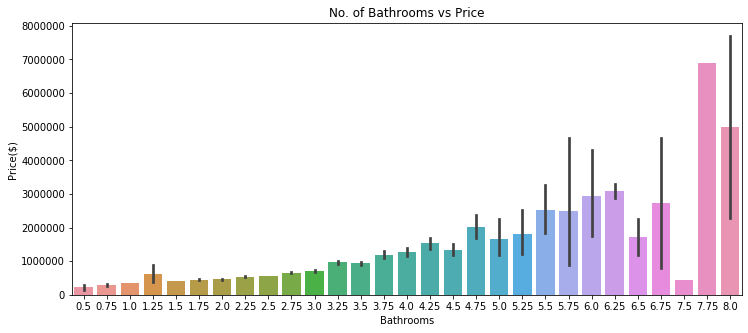

In [139]:
plt.figure(figsize=(12,5))
sns.barplot(x=king_data.bathrooms, y=king_data.price).set(title = 'No. of Bathrooms vs Price', xlabel = 'Bathrooms', ylabel = 'Price($)' );

In [140]:
king_data['condition'].unique()
king_data['grade'].unique()
king_data['zipcode'].unique()
king_data['zipcode'].value_counts()
king_data['sqft_basement'].value_counts()

array([3, 5, 4, 1, 2], dtype=int64)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
2360.0        1
704.0         1
1960.0        1
1913.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [141]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

array([nan,  0.,  1.])

In [142]:
king_data.fillna(0, inplace=True)

In [143]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([0., 3., 4., 2., 1.])

array([0., 1.])

In [144]:
# Replacing the '?' in our data frame
king_data = king_data.replace(to_replace='?', value = 0.0)
king_data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
415.0         1
274.0         1
2610.0        1
2850.0        1
Name: sqft_basement, Length: 304, dtype: int64

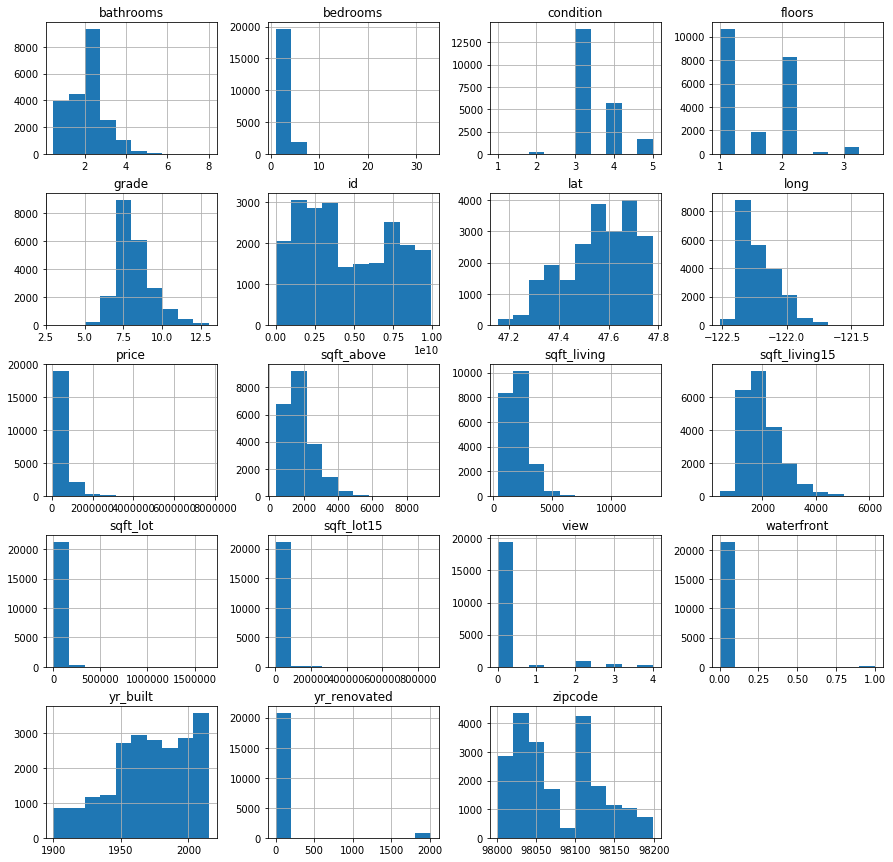

In [145]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
king_data.hist(ax = ax);

In [146]:
#Create a new column to indicate if the house is renovated or not.

king_data['renovated'] = king_data['yr_renovated']
king_data['renovated'] = king_data['renovated'].astype(str)
king_data['renovated']=np.where(king_data['renovated'] != '0.0' , '1', '0')
king_data.head()
king_data['renovated'].unique()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


array(['0', '1'], dtype=object)

### Adding a new feature, Distance to Bellevue, which is a downtown close to King County.
With the help of Haversine formula we can find the distance between the locations using the Latitude and Longitude. 
The reasoning behind this is that people tend to select their homes based on the proximity to their Workplace/Downtown. 

In [147]:
# Distance function
from haversine import haversine

# Location of Bellevue
bellevue = (47.6111636,-122.3729398)

# Initialize a list to store the distances between locations and Bellevue  
# Then loop through the dataframe and calculate distance using Haversine formula
distance_diff= []
dist_belle = []

for index, row in king_data.iterrows():
    distance_diff.append(haversine(bellevue, (row['lat'],row['long']) , unit='mi'))
    
# Store the values in the dataframe
king_data['miles_to_belle'] = distance_diff


In [148]:
king_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,8.770690
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,10.911701
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537


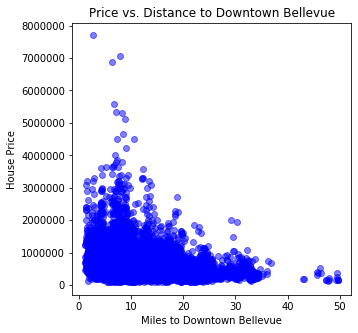

In [149]:
plt.figure(figsize = (5,5));
plt.scatter(king_data['miles_to_belle'],king_data['price'],alpha=0.5, color='blue')
plt.title("Price vs. Distance to Downtown Bellevue")
plt.xlabel("Miles to Downtown Bellevue")
plt.ylabel("House Price")

plt.show();


In [150]:
king_data['miles_to_belle'].unique()

array([ 8.77069009,  7.99324404, 10.91170126, ...,  6.96008862,
        3.63417743,  3.64084605])

In [151]:
def plotting_histo(data_param, col_param):
    for x in col_param:
        fig, ax = plt.subplots(1,2,sharey=True)
        ax[0].hist(data_param[x])
        ax[0].set_ylabel("Counts")
        ax[0].set_xlabel("No. of "+x)
    
        ax[1].hist(data_param[x].apply(np.log))
        ax[1].set_xlabel("Log Value of "+x)

        plt.suptitle("Comparison for "+x,color='red')
        plt.show();

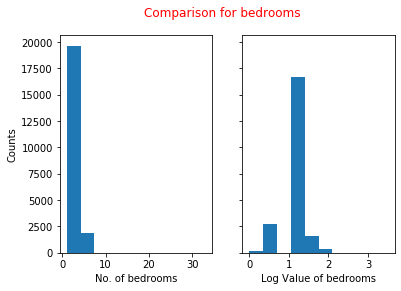

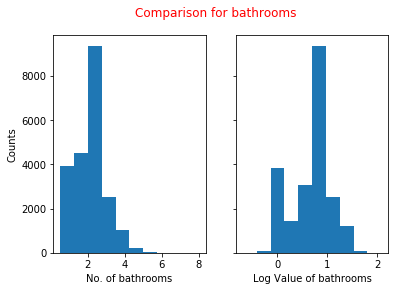

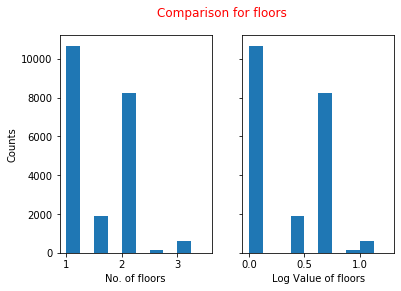

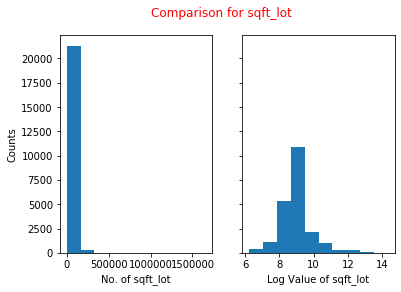

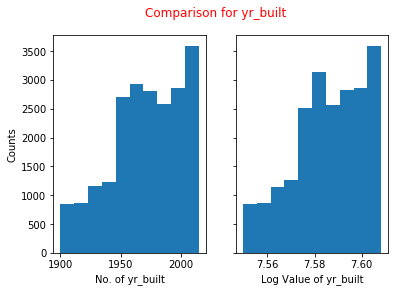

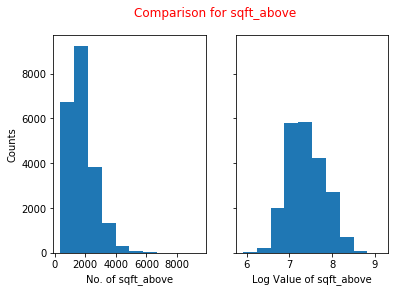

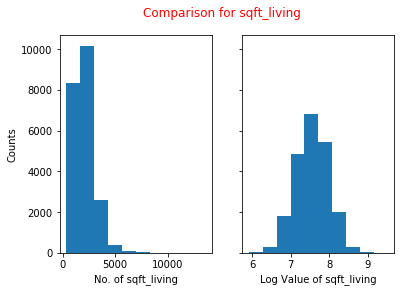

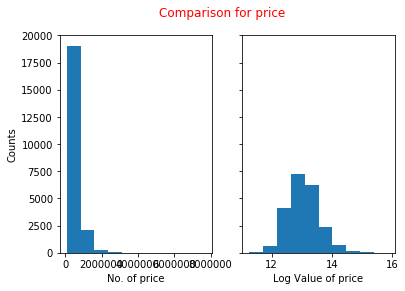

In [152]:
colList=['bedrooms','bathrooms','floors','sqft_lot','yr_built','sqft_above','sqft_living','price']
plotting_histo(king_data,colList)

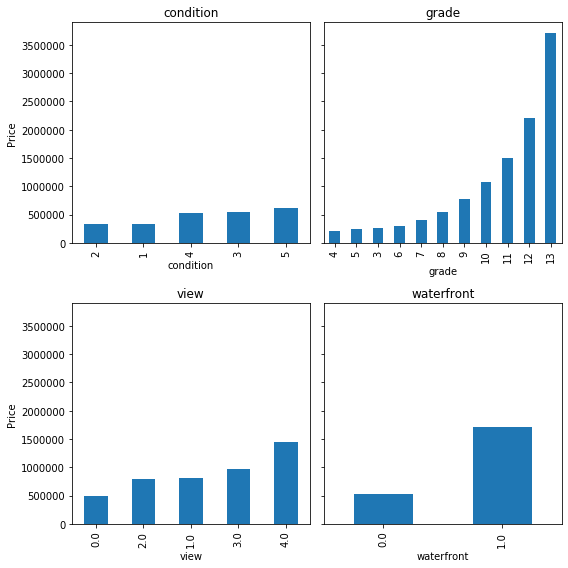

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)

categoricals = ['condition', 'grade', 'view', 'waterfront']

for col, ax in zip(categoricals, axes.flatten()):
    (king_data.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    ax.set_ylabel('Price')
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout();

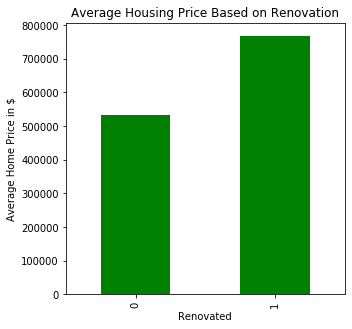

In [154]:
#To understand the effect of renovation on the price of a house

king_data.groupby("renovated").price.mean().plot(kind="bar",figsize=(5,5),color="green");
plt.title("Average Housing Price Based on Renovation")
plt.ylabel("Average Home Price in $")
plt.xlabel("Renovated");

### Selecting our data based on the price of the house

In [155]:
# Creating a new data frame for prices of homes between 200000 and 700000
king_data_price=king_data[(king_data['price'] >= 200000) & (king_data['price'] <= 700000)]
king_data_price
log_king=king_data_price.copy()
len(king_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,8.770690
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,0,1995,0.0,98003,47.3097,-122.327,2238,6819,0,20.939411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,6.217377
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,6.960089
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,3.634177
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,15.125662


16493

In [156]:
# Creating a new data frame for prices between 300000 and 600000
new_data_price=king_data[(king_data['price'] >= 300000) & (king_data['price'] <= 600000)]
new_data_price.head()

len(new_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,0.0,1927,0.0,98028,47.7558,-122.229,1780,12697,0,12.029012


10915

About 50% of our data lies between the price of 300000 and 600000

In [157]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 21596
Data columns (total 23 columns):
id                16493 non-null int64
date              16493 non-null datetime64[ns]
price             16493 non-null float64
bedrooms          16493 non-null int64
bathrooms         16493 non-null float64
sqft_living       16493 non-null int64
sqft_lot          16493 non-null int64
floors            16493 non-null float64
waterfront        16493 non-null float64
view              16493 non-null float64
condition         16493 non-null int64
grade             16493 non-null int64
sqft_above        16493 non-null int64
sqft_basement     16493 non-null object
yr_built          16493 non-null int64
yr_renovated      16493 non-null float64
zipcode           16493 non-null int64
lat               16493 non-null float64
long              16493 non-null float64
sqft_living15     16493 non-null int64
sqft_lot15        16493 non-null int64
renovated         16493 non-null object
miles_

In [158]:
price_perc=(len(king_data_price)/len(king_data)) * 100
print(price_perc)

76.36708802148446


In [159]:
king_data_price['sqft_basement'] = king_data_price.sqft_basement.astype('float')
king_data_price['renovated'] = king_data_price.renovated.astype('int')
king_data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 21596
Data columns (total 23 columns):
id                16493 non-null int64
date              16493 non-null datetime64[ns]
price             16493 non-null float64
bedrooms          16493 non-null int64
bathrooms         16493 non-null float64
sqft_living       16493 non-null int64
sqft_lot          16493 non-null int64
floors            16493 non-null float64
waterfront        16493 non-null float64
view              16493 non-null float64
condition         16493 non-null int64
grade             16493 non-null int64
sqft_above        16493 non-null int64
sqft_basement     16493 non-null float64
yr_built          16493 non-null int64
yr_renovated      16493 non-null float64
zipcode           16493 non-null int64
lat               16493 non-null float64
long              16493 non-null float64
sqft_living15     16493 non-null int64
sqft_lot15        16493 non-null int64
renovated         16493 non-null int32
miles_

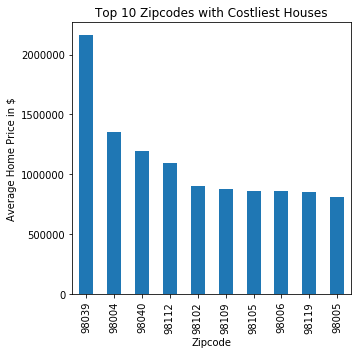

In [160]:
# create a chart to have the top 10 zipcodes that have the costliest houses
cols=['zipcode','price']
temp_df=king_data.loc[:, cols]
temp_df.groupby("zipcode").price.mean().sort_values(ascending=False).head(10).plot(kind="bar",figsize=(5,5));
plt.title("Top 10 Zipcodes with Costliest Houses")
plt.ylabel("Average Home Price in $")
plt.xlabel("Zipcode");

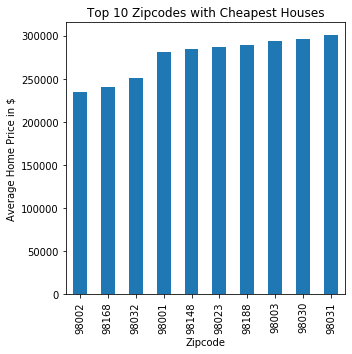

In [161]:
# create a chart to have the top 10 zipcodes that have the cheapest houses
cols=['zipcode','price']
temp_df=king_data.loc[:, cols]
temp_df.groupby("zipcode").price.mean().sort_values().head(10).plot(kind="bar",figsize=(5,5));
plt.title("Top 10 Zipcodes with Cheapest Houses")
plt.ylabel("Average Home Price in $")
plt.xlabel("Zipcode");

In [162]:
# the 10 most expansive and 10 least expansive zipcodes in king county

cols=['price','bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'miles_to_belle','zipcode']
temp_df=king_data.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()
temp.sort_values(by=('price'),ascending=False).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98039,2.161300e+06,4.060000,3.200000,1.560000,3800.900000,17403.560000,6.599751
98004,1.356524e+06,3.854890,2.527603,1.432177,2909.022082,13104.220820,7.937048
98040,1.194874e+06,4.028369,2.716312,1.505319,3106.833333,13704.464539,7.808696
98112,1.096239e+06,3.509294,2.373606,1.806691,2498.743494,4990.431227,3.753964
98102,8.996077e+05,3.250000,2.283654,1.990385,2151.048077,3605.153846,2.973067
98109,8.800778e+05,3.192661,2.158257,1.729358,2054.779817,3621.082569,2.165731
98105,8.632289e+05,3.580786,2.159389,1.591703,2150.576419,5121.165939,5.277853
98006,8.599386e+05,3.841365,2.555723,1.459839,2888.295181,13383.435743,11.185322
98119,8.497148e+05,3.260870,2.224185,1.793478,2005.614130,3615.217391,2.033347


In [163]:
temp.sort_values(by=('price')).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98002,234284.035176,3.326633,1.839196,1.334171,1627.743719,7517.633166,22.193621
98168,240328.371747,2.996283,1.433086,1.159851,1468.624535,11269.843866,8.953990
98032,251296.240000,3.392000,1.708000,1.220000,1738.048000,10379.760000,17.017408
98001,281194.869806,3.393352,2.011773,1.430748,1903.783934,14967.002770,21.418145
98148,284908.596491,3.140351,1.793860,1.210526,1610.526316,8960.719298,12.177007
98023,286742.811623,3.424850,2.061623,1.323647,1989.729459,10470.208417,20.922827
98188,289078.345588,3.433824,1.863971,1.227941,1802.772059,10126.080882,12.118079
98003,294111.278571,3.357143,2.047321,1.310714,1928.882143,10603.096429,20.643349
98030,296187.980469,3.500000,2.162109,1.503906,1962.500000,11778.734375,18.787809


Text(0, 0.5, 'Average Home Price in $')

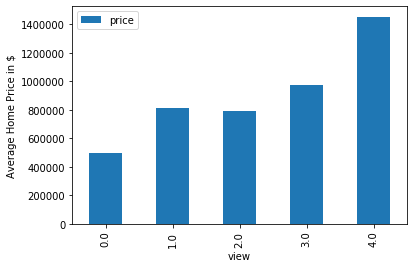

In [164]:
# View with Price

cols=['price','view']
temp_df=king_data.loc[:, cols]
temp_df.groupby('view').mean().plot.bar()
plt.ylabel("Average Home Price in $")

In [165]:
king_data_price = king_data_price.drop('date',axis=1)
king_data_price = king_data_price.drop('id', axis=1)
king_data_price.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,8.770690
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0,20.939411
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0,14.193580
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0,7.033347
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
10,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,10.643058
11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943


In [166]:
# Creating a dictionary to save results of the models being used. 

def store_results_to_dict(model_name, model_desc, r2, r2_adj):
    #,train_rmse,test_rmse):
    curr_dict = None
    curr_dict = {'Model_Name':model_name
                 ,'Model_Description':model_desc
                 ,'R2_value':r2
                 ,'R2_Adjusted value':r2_adj
                }
        
              
    return curr_dict

# To keep a track of all results
results = []

### OLS Model Baseline
In statistics, Ordinary Least Square (OLS) regression is a method for estimating the unknown parameters in a linear 
regression model. It minimizes the sum of squared vertical distances between the observed values and the values predicted by 
the linear approximation.

__Now, we Run a linear model with Price as the target variable in StatsModels__

In [167]:
# OLS Modelling with all features

outcome = 'price'
predictors = king_data_price.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model_b = ols(formula=formula, data=king_data_price).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1477.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:25:59   Log-Likelihood:            -2.0945e+05
No. Observations:               16493   AIC:                         4.189e+05
Df Residuals:                   16472   BIC:                         4.191e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.758e+07   1.73e+06     27.424      0.000    4.42e+07     5.1e+07
bedrooms       -6784.2071    887.915     -7.641      0.000   -8524.616   -5043.799
bathrooms       1.706e+04   1569.231     10.870      0.000     1.4e+04    2.01e+04
sqft_living       44.8591      9.311      4.818      0.000      26.609      63.109
sqft_lot           0.2581      0.026      9.802      0.000       0.206       0.310
floors          1.266e+04   1701.112      7.443      0.000    9327.061     1.6e+04
waterfront      1.357e+05   1.57e+04      8.637      0.000    1.05e+05    1.66e+05
view             2.17e+04   1268.931     17.104      0.000    1.92e+04    2.42e+04
condition       1.733e+04   1073.399     16.143      0.000    1.52e+04    1.94e+04
grade           4.638e+04   1080.636     42.919      0.000    4.43e+04    4.85e+04
sqft_above        10.9198      9.297      1.175      0.240      -7.303      29.143
sqft_basement     -1.0972      9.227     -0.119      0.905     -19.183      16.989
yr_built        -900.5830     35.832    -25.134      0.000    -970.817    -830.349
yr_renovated     759.4484    228.985      3.317      0.001     310.613    1208.283
zipcode         -225.2550     15.438    -14.591      0.000    -255.515    -194.995
lat             2.359e+05   6246.486     37.764      0.000    2.24e+05    2.48e+05
long            2.862e+05   7595.904     37.682      0.000    2.71e+05    3.01e+05
sqft_living15     38.3494      1.854     20.680      0.000      34.714      41.984
sqft_lot15         0.1559      0.038      4.105      0.000       0.081       0.230
renovated      -1.507e+06   4.56e+05     -3.302      0.001    -2.4e+06   -6.13e+05
miles_to_belle -1.033e+04    201.356    -51.299      0.000   -1.07e+04   -9934.639
==============================================================================
Omnibus:                      193.357   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.722
Skew:                           0.219   Prob(JB):                     1.94e-48
Kurtosis:                       3.357   Cond. No.                     2.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Run the same model in Scikit-Learn

In [168]:
y = king_data_price[['price']]
X = king_data_price.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, king_data_price['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 79571.25603748707
Test RMSE score is : 78330.8465468179
Train R2 value: 0.6393122097165265
Test R2 value: 0.6492468019570593


In [169]:
results = store_results_to_dict('Baseline Model','Baseline(with all variables)'
                                     ,model_b.rsquared, model_b.rsquared_adj)
                                     
results

{'Model_Name': 'Baseline Model',
 'Model_Description': 'Baseline(with all variables)',
 'R2_value': 0.6419674247852021,
 'R2_Adjusted value': 0.641532708205291}

In [170]:
results_final = []
results_final.append(results)

### Feature Selection
We are scaling our continuous variables and categorizing our categorical variables.

In [171]:
cont_var=['bedrooms','bathrooms','floors','sqft_basement','sqft_lot','yr_built','lat','long','sqft_living15','miles_to_belle']

# Using the continuous variables
new_cont = king_data_price[cont_var]

# Standardize the varibales(subract from the mean and divide by std dev.)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

new_norm = new_cont.apply(normalize)

data_final = pd.DataFrame([])

grade_dummies = pd.get_dummies(king_data_price['grade'], prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(king_data_price['condition'], prefix='cond', drop_first=True)
view_dummies = pd.get_dummies(king_data_price['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(king_data_price['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(king_data_price['zipcode'], prefix='zip', drop_first=True)
reno_dummies = pd.get_dummies(king_data_price['renovated'], prefix='reno', drop_first=True)

sale_price = king_data_price['price']
data_final = pd.concat([sale_price,new_norm,grade_dummies,condition_dummies,zipcode_dummies,view_dummies,waterfront_dummies,reno_dummies], axis=1)




In [172]:
data_final=data_final.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
new=data_final.copy()
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 21596
Data columns (total 97 columns):
price             16493 non-null float64
bedrooms          16493 non-null float64
bathrooms         16493 non-null float64
floors            16493 non-null float64
sqft_basement     16493 non-null float64
sqft_lot          16493 non-null float64
yr_built          16493 non-null float64
lat               16493 non-null float64
long              16493 non-null float64
sqft_living15     16493 non-null float64
miles_to_belle    16493 non-null float64
grade_4           16493 non-null uint8
grade_5           16493 non-null uint8
grade_6           16493 non-null uint8
grade_7           16493 non-null uint8
grade_8           16493 non-null uint8
grade_9           16493 non-null uint8
grade_10          16493 non-null uint8
grade_11          16493 non-null uint8
cond_2            16493 non-null uint8
cond_3            16493 non-null uint8
cond_4            16493 non-null uint8
cond_5     

In [173]:
#Model Prediction 1
outcome1 = 'price'
predictors_1 = data_final.drop('price', axis=1)
pred_sum_1 = '+'.join(predictors_1.columns)
formula = outcome1 + '~' + pred_sum_1

model1 = ols(formula=formula, data=data_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     483.9
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:26:01   Log-Likelihood:            -2.0684e+05
No. Observations:               16493   AIC:                         4.139e+05
Df Residuals:                   16396   BIC:                         4.146e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.223e+05   7.04e+04      4.575      0.000    1.84e+05     4.6e+05
bedrooms        9934.0369    649.087     15.305      0.000    8661.755    1.12e+04
bathrooms       1.913e+04    859.084     22.265      0.000    1.74e+04    2.08e+04
floors          1469.6519    824.280      1.783      0.075    -146.026    3085.330
sqft_basement   4378.8972    671.072      6.525      0.000    3063.522    5694.272
sqft_lot        1.151e+04    582.417     19.764      0.000    1.04e+04    1.27e+04
yr_built       -1.658e+04    935.375    -17.730      0.000   -1.84e+04   -1.48e+04
lat            -4903.2283   4885.695     -1.004      0.316   -1.45e+04    4673.264
long            5.126e+04   4584.330     11.182      0.000    4.23e+04    6.02e+04
sqft_living15    3.27e+04    775.882     42.147      0.000    3.12e+04    3.42e+04
miles_to_belle -6.565e+04   4187.407    -15.677      0.000   -7.39e+04   -5.74e+04
grade_4        -7.614e+04   7.04e+04     -1.081      0.280   -2.14e+05    6.19e+04
grade_5        -8.548e+04   6.83e+04     -1.252      0.211   -2.19e+05    4.84e+04
grade_6        -6.475e+04   6.81e+04     -0.951      0.342   -1.98e+05    6.87e+04
grade_7        -2.584e+04   6.81e+04     -0.380      0.704   -1.59e+05    1.08e+05
grade_8         1.962e+04   6.81e+04      0.288      0.773   -1.14e+05    1.53e+05
grade_9         8.145e+04   6.81e+04      1.195      0.232   -5.21e+04    2.15e+05
grade_10        1.108e+05   6.83e+04      1.621      0.105   -2.32e+04    2.45e+05
grade_11        1.476e+05   7.23e+04      2.042      0.041    5902.514    2.89e+05
cond_2          4.104e+04   1.69e+04      2.426      0.015    7885.035    7.42e+04
cond_3          6.153e+04   1.58e+04      3.906      0.000    3.07e+04    9.24e+04
cond_4          7.667e+04   1.58e+04      4.866      0.000    4.58e+04    1.08e+05
cond_5          9.814e+04   1.58e+04      6.195      0.000    6.71e+04    1.29e+05
zip_98002       -1.85e+04   7030.226     -2.632      0.009   -3.23e+04   -4720.082
zip_98003       -227.3997   5930.404     -0.038      0.969   -1.19e+04    1.14e+04
zip_98004       1.832e+05   1.69e+04     10.808      0.000     1.5e+05    2.16e+05
zip_98005       1.153e+05   1.44e+04      8.012      0.000    8.71e+04    1.44e+05
zip_98006       6.146e+04   1.18e+04      5.209      0.000    3.83e+04    8.46e+04
zip_98007       7.064e+04   1.36e+04      5.180      0.000    4.39e+04    9.74e+04
zip_98008       7.916e+04   1.29e+04      6.115      0.000    5.38e+04    1.05e+05
zip_98010       3.478e+04    1.1e+04      3.152      0.002    1.32e+04    5.64e+04
zip_98011       4.799e+04   1.54e+04      3.123      0.002    1.79e+04    7.81e+04
zip_98014       6031.1234   1.74e+04      0.347      0.729   -2.81e+04    4.01e+04
zip_98019       1755.6171   1.71e+04      0.103      0.918   -3.17e+04    3.52e+04
zip_98022   

In [174]:
results = store_results_to_dict('Model1','All preliminary variables included after Feature selection'
                                     ,model1.rsquared, model1.rsquared_adj)
                       
results

{'Model_Name': 'Model1',
 'Model_Description': 'All preliminary variables included after Feature selection',
 'R2_value': 0.7391320188688211,
 'R2_Adjusted value': 0.737604614246438}

In [175]:
results_final.append(results)

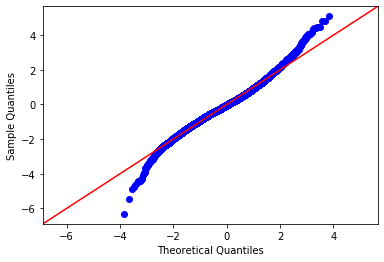

In [176]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig1 = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

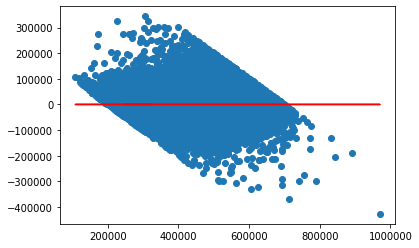

In [177]:
plt.scatter(model1.predict(predictors_1), model1.resid)
plt.plot(model1.predict(predictors_1), [0 for i in range(len(predictors_1))],c='red');

In [178]:
#Dropping columns based on p value
data_final.drop(['floors','lat','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','zip_98003','zip_98014','zip_98019','zip_98022','zip_98023','zip_98024','zip_98045','zip_98059','zip_98118','zip_98146','zip_98148'], axis=1,inplace=True)

data_final.head()

,price,bedrooms,bathrooms,sqft_basement,sqft_lot,yr_built,long,sqft_living15,miles_to_belle,grade_11,...,zip_98178,zip_98188,zip_98198,zip_98199,view_1,view_2,view_3,view_4,water_1,reno_1
0,221900.0,-0.306124,-1.499525,-0.641779,-0.221641,-0.564417,-0.290304,-0.957245,-0.585137,0,...,1,0,0,0,0,0,0,0,0,0
1,538000.0,-0.306124,0.397104,0.407164,-0.176560,-0.704522,-0.725118,-0.269214,-0.695099,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.817101,1.535082,1.744565,-0.240048,-0.214154,-1.244090,-0.917929,-0.932726,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.306124,0.017778,-0.641779,-0.152830,0.556424,1.196480,-0.052975,0.335471,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,-0.306124,0.397104,-0.641779,-0.188538,0.836634,-0.781223,0.808047,1.136001,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Model Prediction 2
outcome2 = 'price'
predictors_2 = data_final.drop('price', axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula = outcome2 + '~' + pred_sum_2

model2 = ols(formula=formula, data=data_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     495.9
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:26:04   Log-Likelihood:            -2.0808e+05
No. Observations:               16493   AIC:                         4.163e+05
Df Residuals:                   16416   BIC:                         4.169e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.806e+05    1.7e+04     16.555      0.000    2.47e+05    3.14e+05
bedrooms        1.003e+04    690.594     14.519      0.000    8672.773    1.14e+04
bathrooms       2.697e+04    864.360     31.206      0.000    2.53e+04    2.87e+04
sqft_basement   2375.1510    642.368      3.697      0.000    1116.039    3634.263
sqft_lot        1.211e+04    619.153     19.556      0.000    1.09e+04    1.33e+04
yr_built       -3987.9720    893.990     -4.461      0.000   -5740.289   -2235.655
long            4.569e+04   1246.249     36.666      0.000    4.33e+04    4.81e+04
sqft_living15   4.875e+04    743.992     65.519      0.000    4.73e+04    5.02e+04
miles_to_belle -5.942e+04   1415.136    -41.991      0.000   -6.22e+04   -5.66e+04
grade_11        8.184e+04    2.6e+04      3.148      0.002    3.09e+04    1.33e+05
cond_2          6.181e+04   1.82e+04      3.398      0.001    2.62e+04    9.75e+04
cond_3           9.11e+04   1.69e+04      5.385      0.000    5.79e+04    1.24e+05
cond_4          1.048e+05   1.69e+04      6.197      0.000    7.17e+04    1.38e+05
cond_5          1.255e+05    1.7e+04      7.379      0.000    9.22e+04    1.59e+05
zip_98002      -2.984e+04   6251.556     -4.773      0.000   -4.21e+04   -1.76e+04
zip_98004       1.926e+05   1.36e+04     14.191      0.000    1.66e+05    2.19e+05
zip_98005       1.292e+05   9575.203     13.489      0.000     1.1e+05    1.48e+05
zip_98006       7.766e+04   5579.754     13.919      0.000    6.67e+04    8.86e+04
zip_98007       8.304e+04   7680.779     10.812      0.000     6.8e+04    9.81e+04
zip_98008       8.913e+04   5296.409     16.829      0.000    7.88e+04    9.95e+04
zip_98010       3.383e+04   8194.280      4.128      0.000    1.78e+04    4.99e+04
zip_98011       4.381e+04   5684.240      7.708      0.000    3.27e+04     5.5e+04
zip_98027       5.282e+04   4662.068     11.329      0.000    4.37e+04     6.2e+04
zip_98028       3.633e+04   4801.814      7.566      0.000    2.69e+04    4.57e+04
zip_98029        1.03e+05   5122.343     20.114      0.000     9.3e+04    1.13e+05
zip_98030      -5.014e+04   4931.319    -10.168      0.000   -5.98e+04   -4.05e+04
zip_98031      -7.216e+04   4712.349    -15.313      0.000   -8.14e+04   -6.29e+04
zip_98032      -4.604e+04   7320.010     -6.289      0.000   -6.04e+04   -3.17e+04
zip_98033       1.184e+05   5294.851     22.368      0.000    1.08e+05    1.29e+05
zip_98034       4.484e+04   3844.719     11.662      0.000    3.73e+04    5.24e+04
zip_98038      -3.371e+04   3591.500     -9.386      0.000   -4.08e+04   -2.67e+04
zip_98040       1.639e+05   1.36e+04     12.046      0.000    1.37e+05    1.91e+05
zip_98042      -5.354e+04   3630.923    -14.746      0.000   -6.07e+04   -4.64e+04
zip_98052       9.961e+04   4325.763     23.028      0.000    9.11e+04    1.08e+05
zip_98053   

In [180]:
X_train, X_test, y_train, y_test = train_test_split(predictors_2, data_final['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 72813.56005167835
Test RMSE score is : 73676.29418487955
Train R2 value: 0.69462816046189
Test R2 value: 0.6995532165857361


In [181]:
results = store_results_to_dict('Model2','After dropping values with p>0.05'
                                     ,model2.rsquared, model2.rsquared_adj)
                                
results

{'Model_Name': 'Model2',
 'Model_Description': 'After dropping values with p>0.05',
 'R2_value': 0.6965851815174675,
 'R2_Adjusted value': 0.695180483283752}

In [182]:
results_final.append(results)

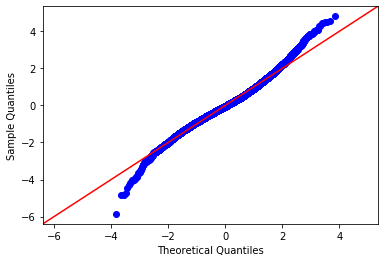

In [183]:
fig2 = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

### Variance Inflation Factor
__Typically, variables with a vif of 5 or greater are displaying multicollinearity with other variables in the feature set.__ 

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = predictors_2
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors_2, vif))

[('bedrooms', 1.4711065988350447),
 ('bathrooms', 2.304374909195908),
 ('sqft_basement', 1.2723581056039368),
 ('sqft_lot', 1.1823285727150008),
 ('yr_built', 2.461059678071091),
 ('long', 4.789451996307434),
 ('sqft_living15', 1.7070124442086638),
 ('miles_to_belle', 6.167020402259868),
 ('grade_11', 1.0114629212495607),
 ('cond_2', 1.0515022958824416),
 ('cond_3', 5.8314511432393115),
 ('cond_4', 3.201447406150355),
 ('cond_5', 1.6466910910355557),
 ('zip_98002', 1.089010757969089),
 ('zip_98004', 1.0330132612852085),
 ('zip_98005', 1.0628951343860613),
 ('zip_98006', 1.1953242360468552),
 ('zip_98007', 1.0918901912261645),
 ('zip_98008', 1.2057263642077771),
 ('zip_98010', 1.0674449724658306),
 ('zip_98011', 1.1041126274727098),
 ('zip_98027', 1.2306485405628866),
 ('zip_98028', 1.1591452225856325),
 ('zip_98029', 1.23075246510233),
 ('zip_98030', 1.09112331541402),
 ('zip_98031', 1.1040573469663504),
 ('zip_98032', 1.0521437691128146),
 ('zip_98033', 1.1880168363367165),
 ('zip_980

In [185]:
df_model_results = pd.DataFrame(results_final)
df_model_results.head()

,Model_Name,Model_Description,R2_value,R2_Adjusted value
0,Baseline Model,Baseline(with all variables),0.641967,0.641533
1,Model1,All preliminary variables included after Featu...,0.739132,0.737605
2,Model2,After dropping values with p>0.05,0.696585,0.695180


### Reselecting the variables
In this model, we are selecting the features whom seem to be having a strong correlation with the Price of the house.
Here we are first log transforming the variables and then normalizing them.

In [186]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 21596
Data columns (total 23 columns):
id                16493 non-null int64
date              16493 non-null datetime64[ns]
price             16493 non-null float64
bedrooms          16493 non-null int64
bathrooms         16493 non-null float64
sqft_living       16493 non-null int64
sqft_lot          16493 non-null int64
floors            16493 non-null float64
waterfront        16493 non-null float64
view              16493 non-null float64
condition         16493 non-null int64
grade             16493 non-null int64
sqft_above        16493 non-null int64
sqft_basement     16493 non-null object
yr_built          16493 non-null int64
yr_renovated      16493 non-null float64
zipcode           16493 non-null int64
lat               16493 non-null float64
long              16493 non-null float64
sqft_living15     16493 non-null int64
sqft_lot15        16493 non-null int64
renovated         16493 non-null object
miles_

In [187]:
# Having a look at our continuous and categorical variables
continuous = ['bedrooms','bathrooms','sqft_lot','sqft_above','sqft_living15','miles_to_belle']

categoricals = ['waterfront', 'grade', 'zipcode','renovated','view']

In [188]:
# Log transform and Standardizing the continuous variables
log_king_cont = log_king[continuous]

# Log transformation
log_names = [f'{column}_log' for column in log_king_cont.columns]

king_log = np.log(log_king_cont)
king_log.columns = log_names

# Standardize the varibales(subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)

In [189]:
grade_dummies = pd.get_dummies(log_king['grade'], prefix='grade', drop_first=True)
renovated_dummies = pd.get_dummies(log_king['renovated'], prefix='reno', drop_first=True)
view_dummies = pd.get_dummies(log_king['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(log_king['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(log_king['zipcode'], prefix='zip', drop_first=True)

In [190]:
# Creating a new data frame to store our variables
preprocessed = pd.concat([log_king.price,king_log_norm, grade_dummies,zipcode_dummies,waterfront_dummies,view_dummies,renovated_dummies], axis=1)

preprocessed.head()

,price,bedrooms_log,bathrooms_log,sqft_lot_log,sqft_above_log,sqft_living15_log,miles_to_belle_log,grade_4,grade_5,grade_6,...,zip_98178,zip_98188,zip_98198,zip_98199,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0,reno_1
0,221900.0,-0.182530,-1.698730,-0.313255,-0.638530,-0.990451,-0.331914,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,538000.0,-0.182530,0.505918,-0.032930,1.024511,-0.146208,-0.478505,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.857628,1.288029,-0.451269,-0.957167,-0.936553,-0.851159,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.182530,0.185705,0.090716,0.325859,0.083201,0.544771,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,-0.182530,0.505918,-0.100893,0.382146,0.875554,1.042447,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
preprocessed=preprocessed.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 21596
Data columns (total 89 columns):
price                 16493 non-null float64
bedrooms_log          16493 non-null float64
bathrooms_log         16493 non-null float64
sqft_lot_log          16493 non-null float64
sqft_above_log        16493 non-null float64
sqft_living15_log     16493 non-null float64
miles_to_belle_log    16493 non-null float64
grade_4               16493 non-null uint8
grade_5               16493 non-null uint8
grade_6               16493 non-null uint8
grade_7               16493 non-null uint8
grade_8               16493 non-null uint8
grade_9               16493 non-null uint8
grade_10              16493 non-null uint8
grade_11              16493 non-null uint8
zip_98002             16493 non-null uint8
zip_98003             16493 non-null uint8
zip_98004             16493 non-null uint8
zip_98005             16493 non-null uint8
zip_98006             16493 non-null uint8
zip_98007        

In [192]:
outcome3 = 'price'
predictors_3 = preprocessed.drop('price', axis=1)
pred_sum_3 = '+'.join(predictors_3.columns)
formula = outcome3 + '~' + pred_sum_3

model3 = ols(formula=formula, data=preprocessed).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     575.1
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:26:18   Log-Likelihood:            -2.0631e+05
No. Observations:               16493   AIC:                         4.128e+05
Df Residuals:                   16404   BIC:                         4.135e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.828e+05   6.61e+04      7.304      0.000    3.53e+05    6.12e+05
bedrooms_log        6624.1734    652.718     10.149      0.000    5344.775    7903.572
bathrooms_log       1.325e+04    749.455     17.684      0.000    1.18e+04    1.47e+04
sqft_lot_log        2.922e+04    706.604     41.347      0.000    2.78e+04    3.06e+04
sqft_above_log      2.767e+04    865.699     31.964      0.000     2.6e+04    2.94e+04
sqft_living15_log    2.04e+04    773.722     26.365      0.000    1.89e+04    2.19e+04
miles_to_belle_log -7.174e+04   2812.169    -25.512      0.000   -7.73e+04   -6.62e+04
grade_4            -1.369e+05   6.82e+04     -2.008      0.045   -2.71e+05   -3280.933
grade_5            -1.802e+05   6.61e+04     -2.725      0.006    -3.1e+05   -5.06e+04
grade_6            -1.744e+05   6.59e+04     -2.646      0.008   -3.04e+05   -4.52e+04
grade_7            -1.552e+05   6.59e+04     -2.354      0.019   -2.84e+05    -2.6e+04
grade_8            -1.251e+05   6.59e+04     -1.896      0.058   -2.54e+05    4202.348
grade_9            -7.582e+04    6.6e+04     -1.149      0.251   -2.05e+05    5.35e+04
grade_10           -4.851e+04   6.62e+04     -0.733      0.464   -1.78e+05    8.12e+04
grade_11           -7054.3076      7e+04     -0.101      0.920   -1.44e+05     1.3e+05
zip_98002            1.38e+04   6620.477      2.084      0.037     821.707    2.68e+04
zip_98003            984.7908   5648.342      0.174      0.862   -1.01e+04    1.21e+04
zip_98004           2.537e+05   1.33e+04     19.132      0.000    2.28e+05     2.8e+05
zip_98005           1.927e+05   9830.311     19.606      0.000    1.73e+05    2.12e+05
zip_98006           1.564e+05   6719.345     23.274      0.000    1.43e+05     1.7e+05
zip_98007           1.609e+05   8181.696     19.672      0.000    1.45e+05    1.77e+05
zip_98008           1.772e+05   6303.549     28.104      0.000    1.65e+05     1.9e+05
zip_98010           9.847e+04   8161.494     12.065      0.000    8.25e+04    1.14e+05
zip_98011           9.537e+04   6573.911     14.507      0.000    8.25e+04    1.08e+05
zip_98014           9.601e+04   7779.423     12.341      0.000    8.08e+04    1.11e+05
zip_98019           9.028e+04   6187.009     14.591      0.000    7.81e+04    1.02e+05
zip_98022           4.733e+04   6294.299      7.520      0.000     3.5e+04    5.97e+04
zip_98023          -1.381e+04   4970.179     -2.778      0.005   -2.35e+04   -4065.602
zip_98024           1.164e+05   9358.119     12.440      0.000    9.81e+04    1.35e+05
zip_98027            1.56e+05   5482.832     28.444      0.000    1.45e+05    1.67e+05
zip_98028           7.363e+04   6141.443     11.990      0.000    6.16e+04    8.57e+04
zip_98029            2.04e+05   5741.082     35.538      0.000    1.93e+05    2.15e+05
zip_98030          -8498.8855   5725.7

In [193]:
results = store_results_to_dict('Model3','Log transforming and Normalizing the selected variables'
                                     ,model3.rsquared, model3.rsquared_adj)

results

{'Model_Name': 'Model3',
 'Model_Description': 'Log transforming and Normalizing the selected variables',
 'R2_value': 0.7552143353271723,
 'R2_Adjusted value': 0.7539011715566768}

In [194]:
results_final.append(results)

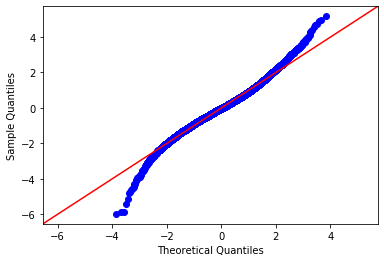

In [195]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

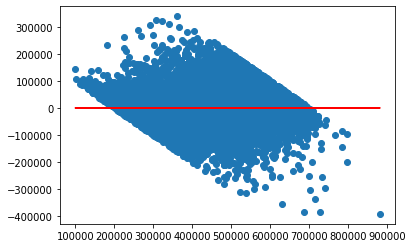

In [196]:
plt.scatter(model3.predict(preprocessed), model3.resid)
plt.plot(model3.predict(preprocessed), [0 for i in range(len(preprocessed))],c='red');

In [197]:
#Dropping columns based on p value
preprocessed.drop(['grade_5','grade_7','grade_8','grade_9','zip_98002','zip_98003','zip_98032','zip_98042','zip_98055','zip_98058','zip_98092','zip_98106','zip_98108','zip_98148','zip_98178','zip_98188'], axis=1,inplace=True)

preprocessed.head()

,price,bedrooms_log,bathrooms_log,sqft_lot_log,sqft_above_log,sqft_living15_log,miles_to_belle_log,grade_4,grade_6,grade_10,...,zip_98168,zip_98177,zip_98198,zip_98199,water_1,view_1,view_2,view_3,view_4,reno_1
0,221900.0,-0.182530,-1.698730,-0.313255,-0.638530,-0.990451,-0.331914,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.182530,0.505918,-0.032930,1.024511,-0.146208,-0.478505,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.857628,1.288029,-0.451269,-0.957167,-0.936553,-0.851159,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.182530,0.185705,0.090716,0.325859,0.083201,0.544771,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,-0.182530,0.505918,-0.100893,0.382146,0.875554,1.042447,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
#Model Prediction 4
outcome4 = 'price'
predictors_4 = preprocessed.drop('price', axis=1)
pred_sum_4 = '+'.join(predictors_4.columns)
formula = outcome4 + '~' + pred_sum_4

model4 = ols(formula=formula, data=preprocessed).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     637.9
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:26:21   Log-Likelihood:            -2.0692e+05
No. Observations:               16493   AIC:                         4.140e+05
Df Residuals:                   16420   BIC:                         4.145e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.351e+05   1412.862    237.170      0.000    3.32e+05    3.38e+05
bedrooms_log        3069.2747    665.179      4.614      0.000    1765.452    4373.097
bathrooms_log       1.728e+04    756.289     22.853      0.000    1.58e+04    1.88e+04
sqft_lot_log        2.722e+04    725.037     37.538      0.000    2.58e+04    2.86e+04
sqft_above_log       3.76e+04    843.844     44.559      0.000    3.59e+04    3.93e+04
sqft_living15_log   2.699e+04    773.596     34.894      0.000    2.55e+04    2.85e+04
miles_to_belle_log -6.463e+04   1408.681    -45.877      0.000   -6.74e+04   -6.19e+04
grade_4             3.236e+04   1.84e+04      1.760      0.079   -3688.649    6.84e+04
grade_6            -1.685e+04   1996.175     -8.440      0.000   -2.08e+04   -1.29e+04
grade_10            6.278e+04   5335.526     11.767      0.000    5.23e+04    7.32e+04
grade_11            9.354e+04   2.42e+04      3.863      0.000    4.61e+04    1.41e+05
zip_98004           2.657e+05   1.26e+04     21.124      0.000    2.41e+05     2.9e+05
zip_98005           2.049e+05   8809.487     23.260      0.000    1.88e+05    2.22e+05
zip_98006           1.688e+05   4981.888     33.890      0.000    1.59e+05    1.79e+05
zip_98007           1.683e+05   6992.896     24.064      0.000    1.55e+05    1.82e+05
zip_98008           1.838e+05   4684.688     39.224      0.000    1.75e+05    1.93e+05
zip_98010           9.475e+04   7623.885     12.428      0.000    7.98e+04     1.1e+05
zip_98011               1e+05   5212.664     19.190      0.000    8.98e+04     1.1e+05
zip_98014           9.501e+04   7193.051     13.208      0.000    8.09e+04    1.09e+05
zip_98019           8.399e+04   5257.076     15.976      0.000    7.37e+04    9.43e+04
zip_98022           4.006e+04   5253.252      7.626      0.000    2.98e+04    5.04e+04
zip_98023          -1.242e+04   3602.346     -3.447      0.001   -1.95e+04   -5357.101
zip_98024           1.151e+05   8984.359     12.816      0.000    9.75e+04    1.33e+05
zip_98027           1.602e+05   4128.969     38.790      0.000    1.52e+05    1.68e+05
zip_98028           7.887e+04   4377.241     18.017      0.000    7.03e+04    8.74e+04
zip_98029            2.15e+05   4537.516     47.386      0.000    2.06e+05    2.24e+05
zip_98030          -1.086e+04   4598.724     -2.362      0.018   -1.99e+04   -1849.824
zip_98031          -1.831e+04   4366.300     -4.194      0.000   -2.69e+04   -9755.018
zip_98033           1.903e+05   4754.641     40.028      0.000    1.81e+05       2e+05
zip_98034           1.051e+05   3402.632     30.897      0.000    9.85e+04    1.12e+05
zip_98038           4.074e+04   3300.552     12.344      0.000    3.43e+04    4.72e+04
zip_98040           2.227e+05   1.26e+04     17.618      0.000    1.98e+05    2.47e+05
zip_98045           1.253e+05   5255.6

In [199]:
X_train, X_test, y_train, y_test = train_test_split(predictors_4, preprocessed['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 67560.04941336723
Test RMSE score is : 69375.12358567624
Train R2 value: 0.7397705842778353
Test R2 value: 0.7255051047272095


In [200]:
results = store_results_to_dict('Model4','After dropping values with p>0.05 with our new dataframe'
                                     ,model4.rsquared, model4.rsquared_adj)

results

{'Model_Name': 'Model4',
 'Model_Description': 'After dropping values with p>0.05 with our new dataframe',
 'R2_value': 0.7366296793298321,
 'R2_Adjusted value': 0.7354748277410226}

In [201]:
results_final.append(results)

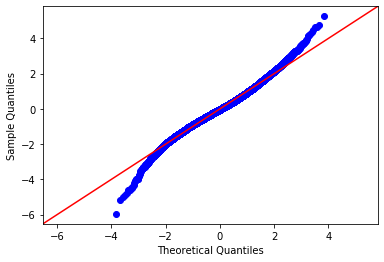

In [202]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

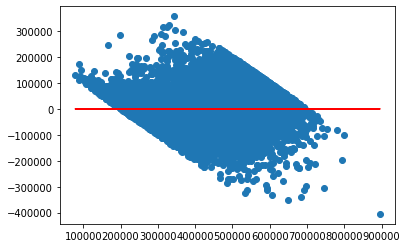

In [203]:
plt.scatter(model4.predict(preprocessed), model4.resid)
plt.plot(model4.predict(preprocessed), [0 for i in range(len(preprocessed))],c='red');

In [204]:
X = predictors_4
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors_4, vif))

[('bedrooms_log', 1.5649671989858023),
 ('bathrooms_log', 2.027171624560579),
 ('sqft_lot_log', 1.8667622747194847),
 ('sqft_above_log', 2.531043069776833),
 ('sqft_living15_log', 2.1142428731872225),
 ('miles_to_belle_log', 5.599113261767636),
 ('grade_4', 1.0204153752567042),
 ('grade_6', 1.3801537313226626),
 ('grade_10', 1.0646716555148186),
 ('grade_11', 1.0109879276013303),
 ('zip_98004', 1.0043683045625822),
 ('zip_98005', 1.0050733672982675),
 ('zip_98006', 1.012101899153184),
 ('zip_98007', 1.001930928205821),
 ('zip_98008', 1.0090381889610867),
 ('zip_98010', 1.0609529989541837),
 ('zip_98011', 1.011269793152743),
 ('zip_98014', 1.0623286291560348),
 ('zip_98019', 1.0692496271409104),
 ('zip_98022', 1.2356675383058353),
 ('zip_98023', 1.1592629859760202),
 ('zip_98024', 1.03881123014612),
 ('zip_98027', 1.053616207479749),
 ('zip_98028', 1.008434939624876),
 ('zip_98029', 1.069898427331375),
 ('zip_98030', 1.0594114704492292),
 ('zip_98031', 1.0405393995881336),
 ('zip_98033'

In [205]:
df_model_results=pd.DataFrame(results_final)
df_model_results.head()

,Model_Name,Model_Description,R2_value,R2_Adjusted value
0,Baseline Model,Baseline(with all variables),0.641967,0.641533
1,Model1,All preliminary variables included after Featu...,0.739132,0.737605
2,Model2,After dropping values with p>0.05,0.696585,0.695180
3,Model3,Log transforming and Normalizing the selected ...,0.755214,0.753901
4,Model4,After dropping values with p>0.05 with our new...,0.736630,0.735475


### Stepwise selection with p-values

- In stepwise selection, we start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values. -

In [206]:
#Stepwise Selection

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - DataFrame with candidate features
        y - Target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living15_log              with p-value 0.0
Add  miles_to_belle_log             with p-value 0.0
Add  sqft_above_log                 with p-value 0.0
Add  sqft_lot_log                   with p-value 5.99442e-115
Add  zip_98029                      with p-value 4.79395e-128
Add  zip_98052                      with p-value 4.2337e-106
Add  zip_98074                      with p-value 7.28315e-91
Add  zip_98168                      with p-value 1.17153e-89
Add  zip_98053                      with p-value 8.03831e-87
Add  zip_98065                      with p-value 5.29836e-87
Add  zip_98027                      with p-value 1.10694e-93
Add  zip_98008                      with p-value 2.59033e-90
Add  zip_98075                      with p-value 2.29703e-88
Add  zip_98033                      with p-value 3.44935e-89
Add  zip_98115                      with p-value 1.00746e-91
Add  bathrooms_log                  with p-value 1.85467e-97
Add  zip_98117                      with p-val

In [207]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model5 = sm.OLS(y,X_with_intercept).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     665.2
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:29:01   Log-Likelihood:            -2.0692e+05
No. Observations:               16493   AIC:                         4.140e+05
Df Residuals:                   16423   BIC:                         4.145e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.344e+05   1364.970    245.001      0.000    3.32e+05    3.37e+05
sqft_living15_log     2.7e+04    773.337     34.917      0.000    2.55e+04    2.85e+04
miles_to_belle_log -6.499e+04   1398.991    -46.454      0.000   -6.77e+04   -6.22e+04
sqft_above_log      3.751e+04    842.699     44.513      0.000    3.59e+04    3.92e+04
sqft_lot_log        2.726e+04    724.983     37.596      0.000    2.58e+04    2.87e+04
zip_98029           2.161e+05   4513.315     47.870      0.000    2.07e+05    2.25e+05
zip_98052           1.878e+05   3759.976     49.953      0.000     1.8e+05    1.95e+05
zip_98074           1.825e+05   4252.185     42.930      0.000    1.74e+05    1.91e+05
zip_98168          -4.056e+04   5096.695     -7.957      0.000   -5.05e+04   -3.06e+04
zip_98053            1.84e+05   4626.652     39.760      0.000    1.75e+05    1.93e+05
zip_98065           1.571e+05   4465.288     35.185      0.000    1.48e+05    1.66e+05
zip_98027           1.612e+05   4104.057     39.281      0.000    1.53e+05    1.69e+05
zip_98008           1.845e+05   4668.873     39.516      0.000    1.75e+05    1.94e+05
zip_98075            2.02e+05   5775.998     34.981      0.000    1.91e+05    2.13e+05
zip_98033           1.909e+05   4741.891     40.268      0.000    1.82e+05       2e+05
zip_98115           1.791e+05   3972.900     45.080      0.000    1.71e+05    1.87e+05
bathrooms_log       1.725e+04    755.981     22.813      0.000    1.58e+04    1.87e+04
zip_98117           1.743e+05   4088.093     42.625      0.000    1.66e+05    1.82e+05
zip_98045           1.266e+05   5222.194     24.236      0.000    1.16e+05    1.37e+05
zip_98006           1.695e+05   4969.956     34.103      0.000     1.6e+05    1.79e+05
zip_98103           1.558e+05   4192.792     37.157      0.000    1.48e+05    1.64e+05
zip_98105           2.103e+05   6692.113     31.432      0.000    1.97e+05    2.23e+05
zip_98107           1.647e+05   5436.504     30.293      0.000    1.54e+05    1.75e+05
zip_98034           1.059e+05   3383.142     31.295      0.000    9.92e+04    1.13e+05
zip_98007            1.69e+05   6984.624     24.191      0.000    1.55e+05    1.83e+05
zip_98072           1.263e+05   4751.175     26.590      0.000    1.17e+05    1.36e+05
zip_98005           2.055e+05   8804.867     23.342      0.000    1.88e+05    2.23e+05
zip_98004           2.662e+05   1.26e+04     21.164      0.000    2.42e+05    2.91e+05
zip_98177           1.252e+05   5270.577     23.750      0.000    1.15e+05    1.36e+05
zip_98112           1.911e+05   8340.392     22.913      0.000    1.75e+05    2.07e+05
zip_98125           1.001e+05   3912.441     25.597      0.000    9.25e+04    1.08e+05
water_1             8.823e+04   1.64e+04      5.396      0.000    5.62e+04     1.2e+05
zip_98077           1.236e+05   6561.5

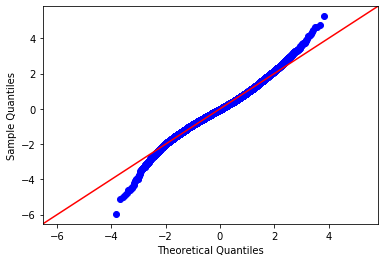

In [208]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

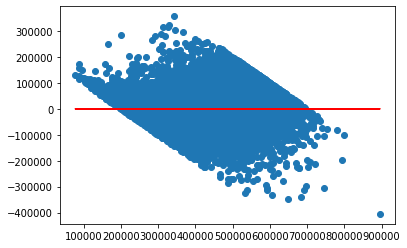

In [209]:
plt.scatter(model5.predict(X_with_intercept), model5.resid)
plt.plot(model5.predict(X_with_intercept), [0 for i in range(len(X_with_intercept))],c='red');


In [210]:
results = store_results_to_dict('Model5','Using stepwise selection'
                                     ,model5.rsquared, model5.rsquared_adj)
results            

{'Model_Name': 'Model5',
 'Model_Description': 'Using stepwise selection',
 'R2_value': 0.7364874006621229,
 'R2_Adjusted value': 0.7353802722839756}

In [211]:
results_final.append(results)

In [212]:
df_model_results = pd.DataFrame(results_final)
df_model_results.style.set_properties(subset=['Model_Description'], **{'width': '300px'})
#df_model_results.head(10)

,Model_Name,Model_Description,R2_value,R2_Adjusted value
0,Baseline Model,Baseline(with all variables),0.641967,0.641533
1,Model1,All preliminary variables included after Feature selection,0.739132,0.737605
2,Model2,After dropping values with p>0.05,0.696585,0.69518
3,Model3,Log transforming and Normalizing the selected variables,0.755214,0.753901
4,Model4,After dropping values with p>0.05 with our new dataframe,0.73663,0.735475
5,Model5,Using stepwise selection,0.736487,0.73538


### Observations

The average cost of a house in King County is about $540,297.

Renovated houses seems to have higher price than non-renovated

Sqft living, bathrooms,grade and zipcode are important features.
Zipcodes 98039 has higher price .
The Sqft living has a positive correlation with the price
Bathrooms has strong positive correlation with price.
Bedrooms also has moderate positive correlation with price

The distance to a downtown/workplace does influence the price of a house.

A house with waterfront feature also has higher price for a house.

### Conclusion

Predicting house prices is quite complex and challenging because they depend on various factors such as 
Sqft living, No. of bathrooms, Grade of a house and Zipcode.
The other factors that influence the price of a house are Distance to workplace, Renovation and Waterfront featu.

__While Modelling, we see that the Grade of a house, Sqaure foot area of a house, Zipcode and Bathrooms have large positive 
coefficients which indicate the effect they have on the pricing of a house__.

In Model 4, we have divided our data into continuous and categorical data. We then took a log of our continuous variables
and then normalized it. We categorized our categorical data and added them into a data frame. We then run our OLS model
and remove variables which have p>0.05. We again run our OLS model and get R2 score of 0.737.
When checking for Normality, the QQ plot looks good too. The Homoscedasticity graph looks quite appropriate.
We also checked for Multicollinearity, and see that the vif values were all under 5. __Hence we will go with the Model 4__.

Our results indicate that in order to provide accurate predictions of house prices, a very large number of features must be 
used and that they most likely need to be combined with a powerful,complex and non-linear model.

### Future work and research
During the EDA, we came across lot of outliers in terms of prices and other features. We would like to investigate that data. 
Also, segment the houses into luxury houses and ordinary houses. Also take into consideration the schools, amenities and the 
neighborhood of the locality that surely increase the price of a house.
